# Stoneburner, Kurt
- ## DSC 550 - Week 05

In [20]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import string
import re

In [18]:
#//***************************************
#//*** Apply Common Cleanup operations
#//***************************************
#//*** These cleanup functions are based on Week 02 cleanup code, and rebuilt for Week 04

#//*****************************************
#//*** Functions:
#//*****************************************
#//*** Mr_clean_text: Converts to lowercase, removes punctuation, newlines and html markup
#//****************************************************************************************************
#//*** Tokenize_series: Converts a Series containing strings, to a series containing tokenized lists
#//****************************************************************************************************
#//*** Remove_stop_words: Removes Stop words based on nltk stopwords 'english' dictionary
#//****************************************************************************************************
#//*** Apply_stemmer: Stem tokenized words using nltk.stem.porter.PorterStemme
#//****************************************************************************************************
#//*** Key values will default to true. If code needs to be defaulted to False, a default_false list can be added later
#//*** All Boolean kwarg keya are stored in kwarg list. This speeds up the coding of the action_dict.
#//*** As Kwargs are added 
def mr_clean_text(input_series, input_options={}):
    
    #//*** import time library
    try:
        type(time)
    except:
        import time
    
    #//*** Start Timing the process
    start_time = time.time()

    
    #//*** Add some data validation. I'm preparing this function for additional use. I'm checking if future users (ie future me)
    #//*** may throw some garbage at this function. Experience has taught me to fail safely wherever possible.

    #//*** All kwargs are listed here. These initialize TRUE by default.
    key_list = [ "lower", "newline", "html", "remove_empty", "punctuation" ]
    
    #//*** Build Action Dictionary
    action_dict = { } 
    
    #//*** Build the keys from kwarg_list and default them to TRUE
    for key in key_list:
        action_dict[key] = True
        
    #//*** Loop through the input kwargs (if any). Assign the action_dict values based on the kwargs:
    for key,value in input_options.items():
        print(key,value)
        action_dict[key] = value
    
    
    #//*************************************************************************
    #//*** The Cleanup/Processing code is a straight lift from DSC550 - Week02
    #//*************************************************************************
    #//*** Convert to Lower Case, Default to True
    if action_dict["lower"]:
        input_series = input_series.str.lower()
    
   
    #//*** Remove New Lines
    if action_dict["newline"]:
        #//*** Rmove \r\n
        input_series = input_series.str.replace(r'\r?\n',"")

        #//*** Remove \n new lines
        input_series = input_series.str.replace(r'\n',"")

    #//*** Remove html entities, observed entities are &gt; and &lt;. All HTML entities begin with & and end with ;.
    #//*** Let's use regex to remove html entities
    if action_dict["html"]:
        input_series = input_series.str.replace(r'&.*;',"")

    #//*** Remove the empty lines
    if action_dict["remove_empty"]:
        input_series = input_series[ input_series.str.len() > 0]

    #//*** Remove punctuation
    if action_dict["punctuation"]:
        #//*** Load libraries for punctuation if not already loaded.
        #//*** Wrapping these in a try, no sense in importing libraries that already exist.
        #//*** Unsure of the cost of reimporting libraries (if any). But testing if library is already loaded feels
        #//*** like a good practice
        try:
            type(sys)
        except:
            import sys

        try:
            type(unicodedata)
        except:
            import unicodedata
        
        #//*** replace Comma and Period with a space.
        for punct in [",","."]:
            input_series = input_series.str.replace(punct," ")

        #//*** Remove punctuation using the example from the book
        punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P') )
        input_series = input_series.str.translate(punctuation)

    print(f"Text Cleaning Time: {time.time() - start_time}")

    return input_series

#//*** Tokenize a Series containing Strings.
#//*** Breaking this out into it's own function for later reuse.
#//*** Not a lot of code here, but it helps to keep the libraries localized. This creates standarization for future
#//*** Stoneburner projects. Also has the ability to add functionality as needed.

def tokenize_series(input_series):
    
    try:
        type(nltk)
    except:
        import nltk
    
    word_tokenize = nltk.tokenize.word_tokenize 
    
    #//*** import time library
    try:
        type(time)
    except:
        import time
    
    #//*** Start Timing the process
    start_time = time.time()
    
    input_series = input_series.apply(word_tokenize)
    
    print(f"Tokenize Time: {time.time() - start_time}")
    
    return input_series

#//*** Remove Stop words from the input list
def remove_stop_words(input_series):
    
    #//*** This function removes stop_words from a series.
    #//*** Works with series.apply()
    def apply_stop_words(input_list):

        #//*** Load Stopwords   
        for word in input_list:
            if word in stop_words:
                input_list.remove(word)
        return input_list

    #//*** import nltk if needed
    try:
        type(nltk)
    except:
        import nltk
        
    stopwords = nltk.corpus.stopwords

    #//*** Stopwords requires an additional download
    try:
        type(stopwords)
    except:
        nltk.download('stopwords')


    #//*** import time library
    try:
        type(time)
    except:
        import time

    #//*** Start Timing the process
    start_time = time.time()


    #//*** The stop_words include punctuation. Stop Word Contractions will not be filtered out.
    stop_words = []

    #//*** Remove apostrophies from the stop_words
    for stop in stopwords.words('english'):
        stop_words.append(stop.replace("'",""))

    
    #//*** Remove Stop words from the tokenized strings in the 'process' column
    #input_series = input_series.apply(remove_stop_words,stop_words)
    
    input_series = input_series.apply(apply_stop_words)

    print(f"Stop Words Time: {time.time() - start_time}")
    
    return input_series

def apply_stemmer(input_series,trim_single_words = True):
    #//*** import nltk if needed
    try:
        type(nltk)
    except:
        import nltk

    #//*** Instantiate the Stemmer
    porter = nltk.stem.porter.PorterStemmer()
    
    #//*** import time library
    try:
        type(time)
    except:
        import time

    #//*** Start Timing the process
    start_time = time.time()
    
    #//*** 1.) Apply() an action to each row
    #//*** 2.) lambda word_list, each row is treated as word_list for the subsequent expression
    #//*** 3.) The base [ word for word in wordlist] would return each word in word_list as a list. 
    #//*** 4.) [porter.stem(word) for word in word_list] - performs stemming on each word and returns a list
    input_series = input_series.apply(lambda word_list: [porter.stem(word) for word in word_list] )
    
    #//*** Remove Single letter words after stemming
    if trim_single_words:
        for word_list in input_series:
            for word in word_list:
                if len(word) < 2:
                    word_list.remove(word)

    print(f"Apply Stemmer Time: {time.time() - start_time}")
    return input_series


In [16]:
#Case Study:  Testing  Hypothesis

#Hypothesis:  Articles about Climate Change are more likely to be published by "Liberal" sources

#NOTE: This case study is not complete!  We are only using the first part of it to practice Graphic Analytics.

#Step 1:  Load data into a dataframe
addr1 = "z_wk05_articles1.csv"

#//*** Added index_col = 0. This sets the first cokumn as the index, and avoids generating the index as the first column.
articles = pd.read_csv(addr1, index_col=0)

          id                                              title  \
0      17283  House Republicans Fret About Winning Their Hea...   
1      17284  Rift Between Officers and Residents as Killing...   
2      17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
3      17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4      17287  Kim Jong-un Says North Korea Is Preparing to T...   
...      ...                                                ...   
53287  73465   Rex Tillerson Says Climate Change Is Real, but …   
53288  73466  The Biggest Intelligence Questions Raised by t...   
53289  73467  Trump Announces Plan That Does Little to Resol...   
53290  73468    Dozens of For-Profit Colleges Could Soon Close    
53291  73469                       The Milky Way’s Stolen Stars   

          publication                         author        date    year  \
0      New York Times                     Carl Hulse  2016-12-31  2016.0   
1      New York Times  Benjamin Mueller and

In [17]:
#//************************************
#//**** INCLUDED CODE SECTION
#//************************************
#Step 2:  check the dimension of the table/look at the data
print("The dimension of the table is: ", articles.shape)

#Display the data
print(articles.head(5))

#what type of variables are in the table 
print("Describe Data")
print(articles.describe())
print("Summarized Data")
print(articles.describe(include=['O']))

#display length of data
print(len(articles))

#display publishers (publications)
print(articles.publication.unique())

#display min, max of years published
print(articles['year'].min())
print(articles['year'].max())

#display how many articles from each year
print(articles['year'].value_counts())


The dimension of the table is:  (50000, 9)
      id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                          author        date    year  month  url  \
0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
3               William McDonald  2017-04-10  2017.0    4.0  NaN   
4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   

                                             content  
0  WASHINGTON  —  

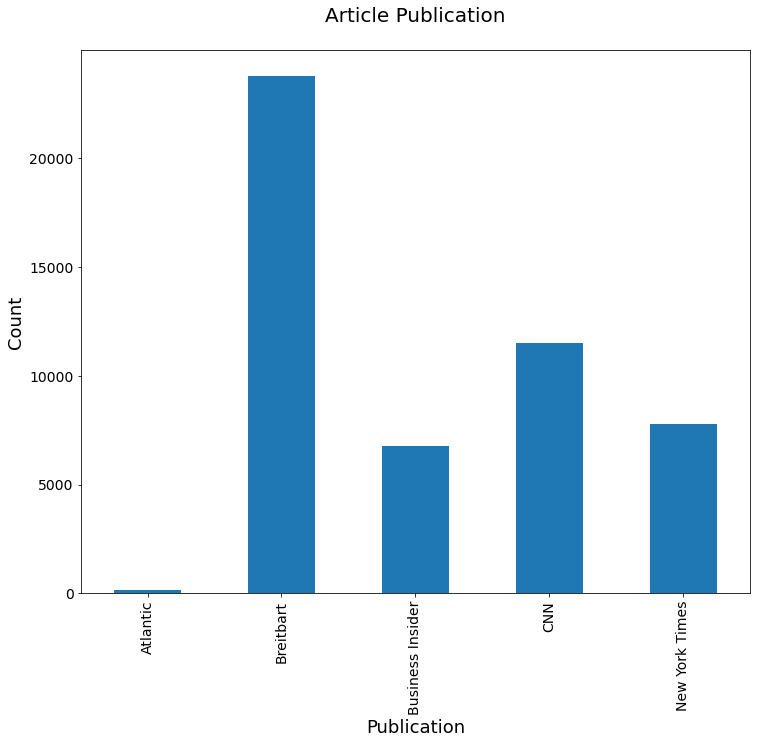

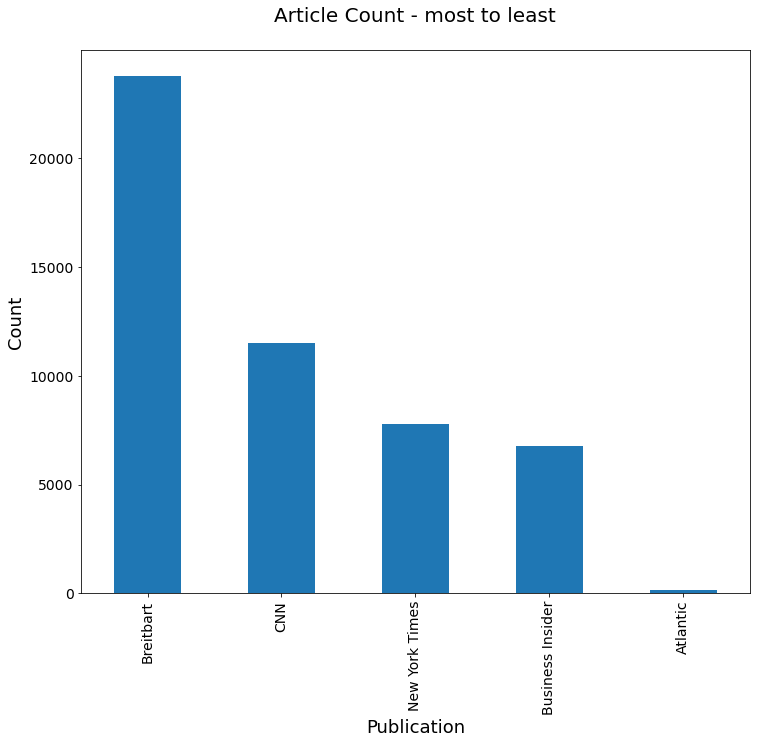

In [6]:
#//************************************
#//**** INCLUDED CODE SECTION
#//************************************
#Step 3:  Create some bar charts to show articles
#display bar chart of articles sorted by Publication Name
ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Publication\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

#display bar chart of articles sorted by counts
ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()


In [22]:
#//************************************
#//**** INCLUDED CODE SECTION
#//************************************
#Step 4: Cleaning
#//*** Keeping this code for reference and comparison to my cleaning functions.
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

articles['tokenized'] = articles['content'].apply(lambda x: clean_text(x))

print("clean text:  ",articles['tokenized'].head())

#look at mean, min, max article lengths
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
print("Mean:  ",articles['num_wds'].mean())
print("Min:  ",articles['num_wds'].min())
print("Max:  ",articles['num_wds'].max())




clean text:   0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object
Mean:   636.26046
Min:   0
Max:   24736


In [24]:
#//*** Processed column will contained the cleaned text as a string.
#//*** Applying cleaning functions individually for clarity

articles['processed'] = mr_clean_text(articles['content'])

TypeError: 'function' object is not subscriptable

In [8]:
#Step 5:  remove articles with no words
len(articles[articles['num_wds']==0])
articles = articles[articles['num_wds']>0]
print("new mean:  ",articles['num_wds'].mean())
print("new min:  ",articles['num_wds'].min())



new mean:   637.0886752778612
new min:   1


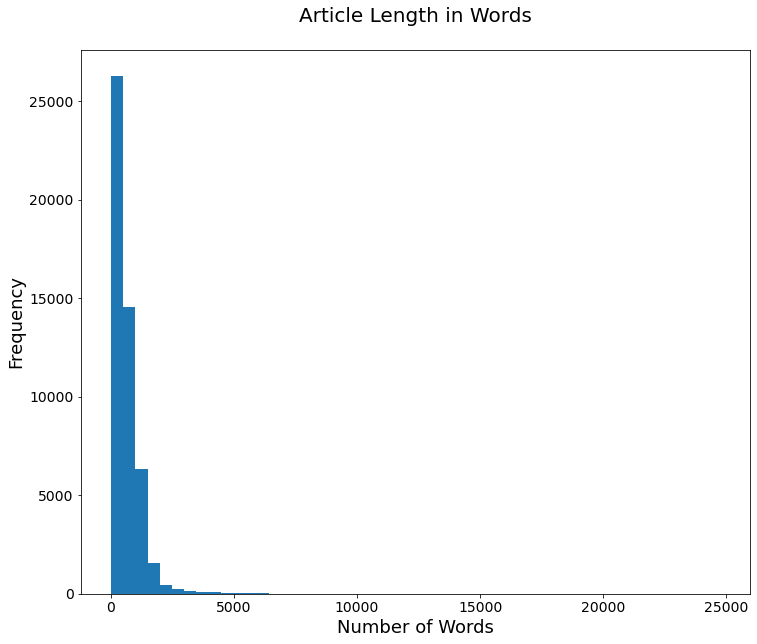

In [10]:
#Step 6:  Check for Outliers:  show bar graph of outliers
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);
plt.show()

In [1]:
#10.1 - Thresholding Numerical Feature Variance

from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

#import data
iris= datasets.load_iris()

#create features and target
features=iris.data
target=iris.target

#create thresholder
thresholder = VarianceThreshold(threshold=.5)

#create high variance feature matrix and print
features_high_variance=thresholder.fit_transform(features)
print(features_high_variance[0:3])

#10.2 - Thresholding Binary Feature Variance

features = [[0,1,0],
            [0,1,1],
            [0,1,0],
            [0,1,1],
            [1,0,0]]

thresholder=VarianceThreshold(threshold = (.75*(1-.75)))
print(thresholder.fit_transform(features))

[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]]
[[0]
 [1]
 [0]
 [1]
 [0]]


In [ ]:
# //*** CODE HERE

In [ ]:
# //*** CODE HERE

In [ ]:
# //*** CODE HERE